### Project :5 Working with Structured Data: Regression

 - In the bustling real estate market of California, accurately predicting house prices is crucial for buyers, sellers, and investors alike. Leveraging the power of deep learning, this project aims to develop a robust predictive model capable of forecasting house prices based on a diverse range of features.

 - The dataset comprises various attributes such as median income of the neighbourhood (MedInc), age of the house, average number of rooms (AveRooms), 
average number of bedrooms (AveBedrms), population, average occupancy, geographical coordinates (latitude and longitude), and the target variable -
MedHouseVal.

 - The objective is to design and train a deep learning model capable of learning complex patterns and relationships within the data to accurately predict house prices.By leveraging the deep learning architecture's capacity to handle large datasets and 
capture intricate dependencies, the model should provide reliable predictions even in the presence of noisy or incomplete data

The proposed solution will involve several key steps:
1. Data Preprocessing: Cleanse the dataset by handling missing values, encoding categorical variables, and normalizing numerical features to ensure optimal model performance.
2. Model Development: Design a deep learning architecture, leveragingtechniques such as multi-layer perceptron (MLP) and Artificial Neural Networks (ANN) tailored to the characteristics of the housing dataset.
3. Model Training: Train the deep learning model using an appropriate optimization algorithm and loss function. Employ techniques such as cross-validation and regularization to prevent overfitting and ensure generalization capability.
4. Model Evaluation: Evaluate the model's performance using metrics such as mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE). Analyze the model's ability to accurately predict house prices across different subsets of the data.
5. Model Deployment: Deploy the trained model into a production environment, allowing stakeholders to utilize it for real-time house price predictions. Develop an intuitive user interface to facilitate easy interaction with the model.


By successfully addressing these challenges, this project aims to provide a valuable tool for individuals and organizations involved in the California real estate market, empowering them to make informed decisions and navigate the dynamic landscape of housing prices effectively.

Dataset: California_housing.csv
`Data Description:`
 - **MedInc**                Median income for households within a block of houses (measured in tens of thousands of US Dollars)
 - **HouseAge**              Age of the house in years
 - **AveRooms**              Average number of rooms within a block
 - **AveBedrms**             Average number of bedrooms within a block
 - **Population**            Total number of people residing within a block
 - **AveOccup**              Total number of households, a group of people residing within a home unit, for a block
 - **longitude**             A measure of how far west a house is; a higher value is farther west
 - **latitude**              A measure of how far north a house is; a higher value is farther north
 - **medianHouseValue**      Median house value for households within a block (measured in US Dollars)

### Initial Guidelines:

Ensure to follow to Use Id’s provided by UNext for naming file as conventions.

Create GitHub account and submit the GitHub link.

### General Instructions

- The assessment has 13 questions, each question is a separate function
- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary


#### NOTE:
Import various libraries and modules used in data analysis, visualization tasks in Python such as `pandas`, `numpy`, `matplotlib`, `sklearn.preprocessing` , `tensorflow` , `matplotlib`, `seaborn`, `sklearn.model_selection` , `tensorflow.keras.models` , `tensorflow.keras.layers` , `sklearn.metrics` , `statsmodels.stats.outliers_influence` , `scikeras.wrappers`


There are 2 ways to import the libraries and modules:
* import numpy as np
* from sklearn.model_selection import train_test_split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

2024-06-27 04:58:47.606346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 04:58:47.674875: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 04:58:47.675693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 04:58:48.801144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Task 1 : Load the dataset and perform preliminary EDA with key observations and insights- (weightage - 20 marks)

##### T1.1.a Load the california_housing dataset as df. (weightage - 2 marks) (AE)

##### NOTE:
The `read_read_csv` method in Pandas allows you to read CSV files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.

In [2]:
def load_california_housing(dataset_location):
    df= None
    #code starts here
    df = pd.read_csv('california_housing.csv')
    #code ends here
    return df

In [3]:
# store the result of the dataset
dataset_location = 'california_housing.csv'
df = load_california_housing(dataset_location)
df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


##### T1.1.b Inside the load_california_housing() function, again load the California_housing dataset and return first five rows and shape of the data frame (weightage - 2 marks) (AE)

##### NOTE: Fetch and store the head and shape of the dataframe `df_housing_data` inside the variables named `head` and `shape`.

In [4]:
def df_head_shape(df):
    head ,shape =  None , None
    #code starts here
    head = df.head()
    shape = df.shape
    #code ends here
    return head,shape

In [5]:
df_head_shape(df)

(   id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0   0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
 1   1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
 2   2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
 3   3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
 4   4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   
 
    Longitude  MedHouseVal  
 0    -120.12        0.980  
 1    -121.22        0.946  
 2    -120.45        1.576  
 3    -117.09        1.336  
 4    -122.41        4.500  ,
 (37137, 10))

##### T1.2 : Check for missing values and impute missing values if required  (weightage - 2 marks)  (AE)


##### Note:
- The function `missing_values` should find the no.of missing values and if there are any missing values in any column it should fill the missing values using suitable type of filling the missing values. It should return the the dataframe df_housing_data with out any missing values.


In [6]:
def missing_values(df):
    x =  None
    #code starts here
    x = df.isnull().sum()
    # code ends here
    return x

In [7]:
missing_values(df)

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

##### T1.3 : Find and print the IQR value for the MedHouseVal column in the find_iqr() function mentioned below (weightage - 2 marks) (AE)

##### Note:
- The function `find_iqr` should calculate the Interquartile Range (IQR) for the column `MedHouseVal` in the dataframe `df_housing_data`
- Compute 25th percentile (Q1) and 75th percentile (Q3) of the data in the column using the numpy library's quantile function.To get IQR value subtract Q1 from Q3.
- Store the IQR value into the variable `iqr_value` and return the varaible.

In [8]:
def find_iqr(df, col):
    iqr_value = None
    # code starts here
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    
    iqr_value = Q3-Q1
    # code ends here
    return iqr_value


In [9]:
find_iqr(df,'MedHouseVal')

1.4520000000000002

#### T1.4 : Detect and remove outliers from all the columns using the IQR method in the remove_outliers_iqr() function ,print the cleaned dataframe and visualize using boxplot before and after outliers (weightage - 3 marks) (AE)
##### Note:
- The Function `remove_outliers_iqr` should return the df_housing_data where the fucntion should remove the outliers using the Interquartile Range (IQR) method.The columns in which the outliers need to be removed are ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'].
- Use for loop for iteration  through each column specified in the `columns_to_check` list.
- Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) for each column as previous function
- Determines lower and upper bounds based on 1.5 times the IQR.
- Filter the DataFrame to retain only rows where values fall within the defined bounds for each column.
- Return the cleaned DataFrame `df_housing_data` without outliers.


##### Visualize the df with outliers using a boxplot

In [10]:
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Boxplot after removing outliers


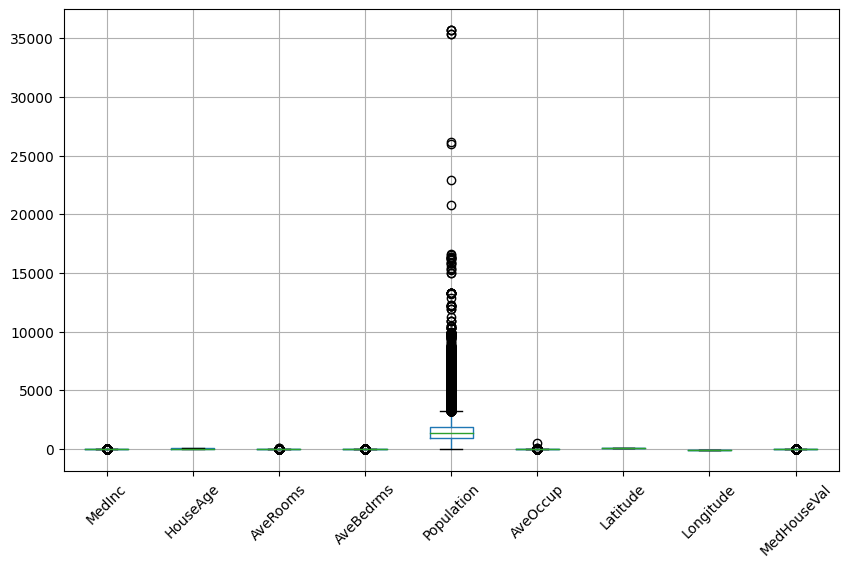

In [11]:
print("Boxplot after removing outliers")
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.xticks(rotation=45)
plt.show()

In [12]:
def remove_outliers_iqr(df, columns):
    #code starts here
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        df = df[ (df[column] >= lower_bound) & (df[column] <= upper_bound) ]
    ## code ends here 
    return df

In [13]:
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
df_clean = remove_outliers_iqr(df, columns_to_check)
df_clean

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37131,37131,2.6913,17.0,3.492991,1.093207,1135.0,2.573770,34.20,-118.48,2.063
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


Visualize the df without the outliers using a boxplot

Boxplot after removing outliers


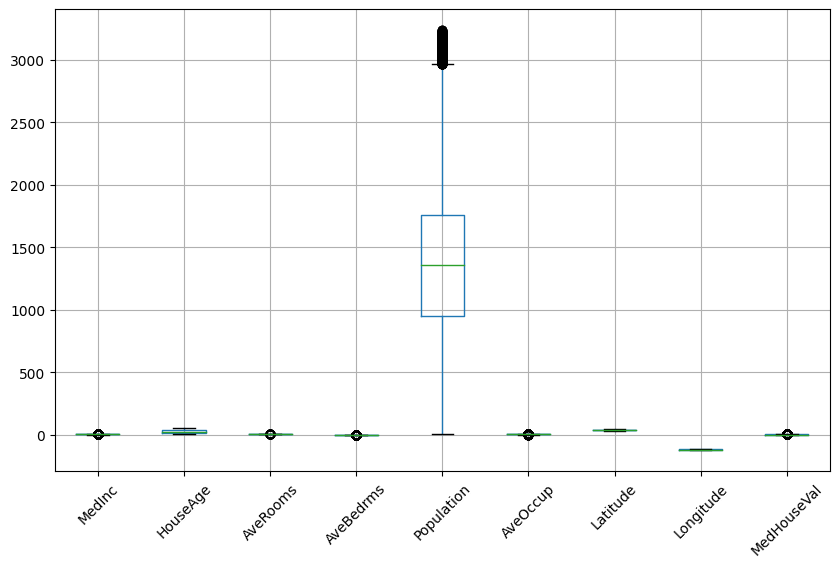

In [14]:
print("Boxplot after removing outliers")
plt.figure(figsize=(10, 6))
df_clean[columns_to_check].boxplot()
plt.xticks(rotation=45)
plt.show()

#### T1.5 : Perform EDA to plot and show the univariate distribution of Median Income using histogram and kdeplots, also visualize MedInc comparing MedHouseVal and HouseAge (weightage - 5 marks)  (ME)
##### Note:
- Define a function `target_class` to analyze the distribution of a target variable within a DataFrame.
- Count the occurrences of each unique value in the target variable column.
- Normalize the counts to obtain proportions.
- Convert the proportions to percentages.
- Perform exploratory data analysis (EDA) to visualize the univariate distribution of Median Income using histogram and kdeplots.
- Compare MedInc with MedHouseVal and HouseAge.
- Import necessary libraries for plotting (matplotlib and seaborn).
- Use seaborn's `displot` to plot the distribution of Median Income (MedInc).
- Set color to green, enable kernel density estimation (kde), and label axes appropriately.
- Display the plot using `plt.show()`.

In [15]:
# Distribution of Median Income
def plot_median_distribution(df):
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df['MedInc'], kde=True)
    plt.title('Distribution of MedIan')
    plt.show()

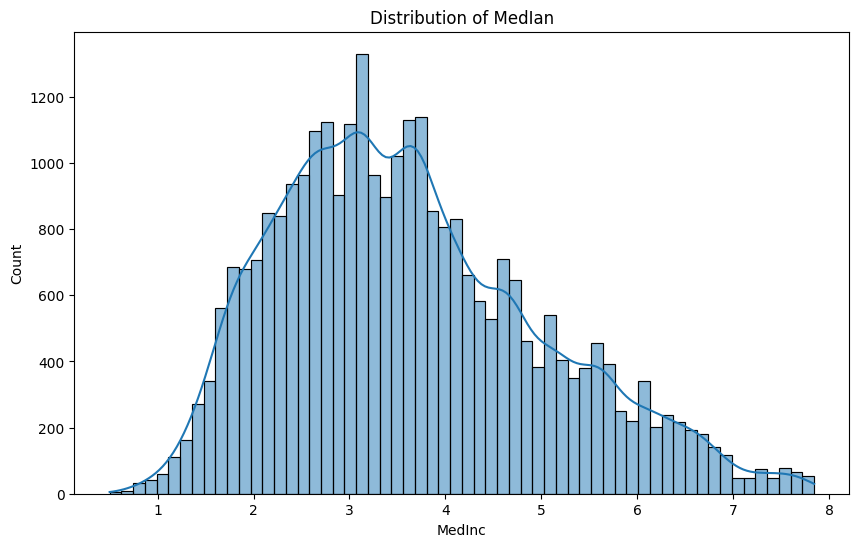

In [16]:
plot_median_distribution(df_clean)

In [17]:
#MedInc comparing MedHouseVal visualization
def compare_medinc(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
    plt.show()

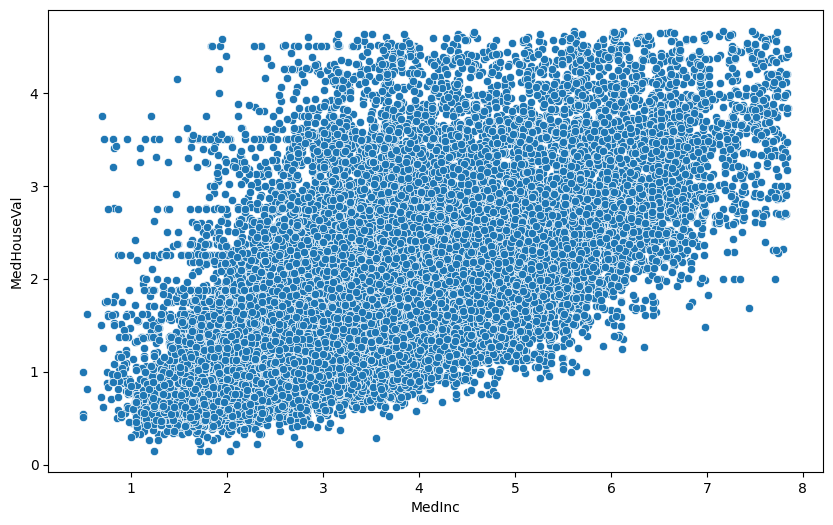

In [18]:
compare_medinc(df_clean)

##### T1.6 : Plot a Heatmap for correlations amongst all features including the target variable in the calculate_correlation_coefficients() function, and return the column with which the MedHouseVal has the highest positive correlation   (weightage - 4 marks) (AE & ME) 
##### Note:
- Define a function `calculate_correlation_coefficients` to compute correlations.
- Use `df.corr()` to calculate the correlation matrix.
- Print the correlation coefficients for each feature with respect to the target variable.
- Return the correlation matrix , highest correlation coefficient
- Plot the heat map of the correlation coefficients

In [19]:
def calculate_correlation_coefficients(df_clean):
    correlation_matrix,highest_correlation_coefficient = None , None
    #code starts here
    
    correlation_matrix=df_clean.corr()
    print("Correlation coefficients with MedHouseVal:")
    print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))
    
    highest_correlation_coefficient = correlation_matrix['MedHouseVal'].drop('MedHouseVal').max()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, vmin=1, vmax=1)
    plt.show()

    
    #code ends here
    return correlation_matrix, highest_correlation_coefficient

Correlation coefficients with MedHouseVal:
MedHouseVal    1.000000
MedInc         0.643973
AveRooms       0.250132
HouseAge       0.057712
id            -0.003862
Population    -0.014731
Longitude     -0.053928
AveBedrms     -0.108438
Latitude      -0.129131
AveOccup      -0.223160
Name: MedHouseVal, dtype: float64


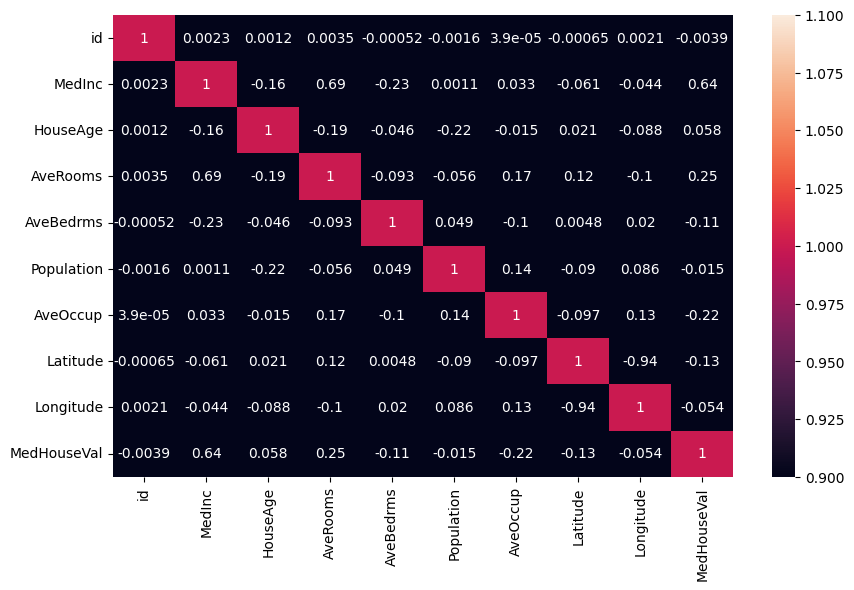

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000,0.002331,0.001216,0.003517,-0.000517,-0.001562,0.000039,-0.000653,0.002143,-0.003862
MedInc,0.002331,1.000000,-0.156725,0.689078,-0.229177,0.001054,0.032929,-0.060586,-0.044272,0.643973
HouseAge,0.001216,-0.156725,1.000000,-0.194202,-0.045645,-0.216403,-0.014772,0.020806,-0.088190,0.057712
AveRooms,0.003517,0.689078,-0.194202,1.000000,-0.093160,-0.055665,0.169896,0.119930,-0.102681,0.250132
AveBedrms,-0.000517,-0.229177,-0.045645,-0.093160,1.000000,0.048636,-0.102998,0.004799,0.020195,-0.108438
Population,-0.001562,0.001054,-0.216403,-0.055665,0.048636,1.000000,0.143046,-0.089669,0.086252,-0.014731
AveOccup,0.000039,0.032929,-0.014772,0.169896,-0.102998,0.143046,1.000000,-0.097358,0.128518,-0.223160
Latitude,-0.000653,-0.060586,0.020806,0.119930,0.004799,-0.089669,-0.097358,1.000000,-0.938068,-0.129131
Longitude,0.002143,-0.044272,-0.088190,-0.102681,0.020195,0.086252,0.128518,-0.938068,1.000000,-0.053928
MedHouseVal,-0.003862,0.643973,0.057712,0.250132,-0.108438,-0.014731,-0.223160,-0.129131,-0.053928,1.000000


In [20]:
correlation_matrix , highest_correlation_coefficient  = calculate_correlation_coefficients(df_clean)
correlation_matrix

##### Plot the heat map of the correlation coefficients (weightage - 1 marks) (ME)

In [21]:
# same as above

### Task 2 : Model Building and metrics evaluation
### Build Linear regression model using deep learning methodologies for predicting the MedHouseVal of the housing data.        
### Evaluate the model's performance using metrics such as MSE,RMSE,MAE,R2-Score,Adjusted R square.      (weightage - 42 Marks)     

##### T2.1 : Normalize the numerical features within the dataset (weightage - 3 marks) (AE)
#### Note:
- Define a scaler object using StandardScaler() to standardize numerical features.
- Apply the scaler to the DataFrame `df_clean` excluding the column 'MedHouseVal' using the `fit_transform` method.
- Create a DataFrame `df_scaled` from the scaled data with original column names.
- Assign the column 'MedHouseVal' from the original DataFrame `df_clean` to the scaled DataFrame `df_scaled`.
- Use index= df_clean.index

In [22]:
from sklearn.preprocessing import StandardScaler
def Normalize(df_clean):
    df_scaled = None
    #code starts here
    scaler = StandardScaler()
    
    feature_to_scale = df_clean.drop(columns=['MedHouseVal'])
    scaled_features = scaler.fit_transform(feature_to_scale)
    
    df_scaled = pd.DataFrame(scaled_features, columns=feature_to_scale.columns, index=df_clean.index)
    
    df_scaled['MedHouseVal'] = df_clean['MedHouseVal']
    # code ends here
    return df_scaled


In [23]:
df_scaled = Normalize(df_clean)

##### T2.2 : Split the data into train and test values with 80:20 split and a random_state of 42  (weightage - 2 marks) (AE)
##### Note:
Define a train-test split for machine learning:
- Separate features (x) and target (y) variables from the DataFrame (`df_scaled`).
- Use `train_test_split` from scikit-learn to split the data into training and testing sets.
- Specify `test_size=0.2` to allocate 20% of the data for testing.
- Set `random_state=42` to ensure reproducibility.

In [24]:
def train_split(df_scaled):
    x_train, x_test, y_train, y_test = None , None , None , None
    # code starts here
    # divide the data into input and output
    X = df_scaled.drop(columns=['MedHouseVal'])
    y = df_scaled['MedHouseVal']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # code ends here
    return x_train, x_test, y_train, y_test

In [25]:
x_train, x_test, y_train, y_test = train_split(df_scaled)

#### Refer to the Github document from Lumen to create the repository and steps to commit

**Add your Github repository link below**

##### T2.3 : Save the cleaned dataset by setting the index=False in your GitHub repository for model building process. (This task is for maintaining the version control of datasets) (weightage - 2 marks)(ME)

In [26]:
# Save the cleaned dataset and upload to Github using the commit commands (Dataset versioning)
df_clean.to_csv("dataset.csv", index=False)

##### T2.4 : Check for multicollinearity, find the Variance inflation factor for all features, remove VIF > 5 and then print the df for the VIF values within the get_highest_vif function (weightage - 5 marks) (AE)
#### Note:
- Define a function `get_highest_vif` to calculate the Variance Inflation Factor (VIF) for each feature in a DataFrame.
- Create an empty DataFrame to store VIF values.
- Add feature names to the DataFrame.
- Calculate VIF for each feature using `variance_inflation_factor`.
- Filter columns with VIF values greater than 5.
- Sort the DataFrame by VIF in descending order.
- Get the name of the column with the highest VIF.
- Return the name of the column with the highest VIF and the remaining columns with VIF less than or equal to 5.
- Call the function `get_highest_vif` with your DataFrame `df_scaled`.
- Uncomment the line and use the `x` dataframe for further coding inside the function
- Print the column with the highest VIF and the remaining columns.

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_highest_vif(df_scaled):
     highest_vif_column_name, sorted_df = None , None
     #code starts here 
     
     # Uncomment the line below while writing the code
     x = df_scaled.drop(columns=['MedHouseVal'])


     # Add feature names to the DataFrame
     vif_data = pd.DataFrame()
     vif_data['Feature'] = x.columns
     # Calculate VIF for each feature
     vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
     # Filter columns with VIF greater than 5
     filtered_vif_data = vif_data[vif_data['VIF'] <= 5]
     # Sort the DataFrame by VIF in descending order
     sorted_df = filtered_vif_data.sort_values(by='VIF', ascending=False)
     # Get the name of the column with the highest VIF (the first row after sorting)
     if not sorted_df.empty:
        highest_vif_column_name = sorted_df.iloc[0]['Feature']
    
     ## code ends here   
     return highest_vif_column_name, sorted_df


In [28]:
get_highest_vif(df_scaled)

('MedInc',
       Feature       VIF
 1      MedInc  2.687833
 3    AveRooms  2.445329
 2    HouseAge  1.171424
 6    AveOccup  1.119870
 5  Population  1.102038
 4   AveBedrms  1.094056
 0          id  1.000047)

##### T2.5 Define the deep neural Network topology (weightage - 5 marks) (ME)
#### Note:
- Define a method create_model to build a neural network model with TensorFlow's Keras API.
- Create a Sequential model.
- Add Dense layers with ReLU activation functions.
- The first layer requires input_shape parameter, which should match the number of features in your training data.
- The last layer has one neuron, assuming it's for binary classification.
- Return the constructed model.
- `Input shape` is defined inside the function, so umcomment the input shape and use that shape for creating the model.

In [29]:
def create_model(x_train):
    model = None
    #code starts here
    # uncomment the below line while writing the code
    model = tf.keras.Sequential()
    input_shape=x_train.shape[1]
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    #code ends here
    return model

In [30]:
model = create_model(x_train)

##### T2.6 :  Compile the NN model and fit the model (weightage - 8 marks) (ME)
#### Note:
- Define a method `compile_and_fit_model` to compile and train a neural network model using Keras. 
- Compile the model using the Adam optimizer and mean squared error loss function.
- Train the model on training data (x_train, y_train) for batch size of 32, epochs of 50 and verbose as 0.

In [31]:
#template
def compile_and_fit_model(model, x_train, y_train):
    #code starts here
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=0)
    #code ends here
    return model, history

In [32]:
x_train, x_test, y_train, y_test = train_split(df_scaled)

In [33]:
model = create_model(x_train)

In [34]:
model, history = compile_and_fit_model(model, x_train, y_train)

##### T2.7 Perform Model evaluation and print various regression metrics (MSE,RMSE,MAE,R2score,MAPE,Adjusted R-score)  (weightage - 6 marks) (AE)
#### Note: 
- Define a method `evaluate_model` to evaluate the performance of a machine learning model.
- Predict the target variable using the model's `predict` method.
- Calculate various evaluation metrics such as Mean Squared Error, R-squared, Root Mean Squared Error, Mean Absolute Error, Mean - Absolute Percentage Error, and Adjusted R-squared.
- Return the evaluation metrics as a DataFrame.Use verbose = 0 for y_pred

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, x_test, y_test):
    mse,rmse,mae,r_squared,mape,adj_r_squared = None , None , None , None, None , None
    #code starts here

    y_pred = model.predict(x_test, verbose=0)
    
    if y_pred.shape[1]==1:
        y_pred=y_pred.flatten()
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    maps = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Adjusted R-squared
    n = x_test.shape[0]
    p = x_test.shape[1]
    adj_r_squared = 1-(1-r2)*((n-1)/(n-p-1))
    #code ends here

    return mse,rmse,mae,r_squared,mape,adj_r_squared

In [36]:
metrics_df = evaluate_model(model, x_test, y_test)

##### T2.8 Optimize neural network performance through hyperparameter tuning using Grid Search Cross Validation and Keras Regressor to get the best parameters and scores. (weightage - 11 marks) (ME)

#### Note:
- Define `create_model_1()` method for neural network setup and wrapping.
- Specify model architecture, compile it, and wrap for Scikit-learn compatibility.
- Set hyperparameters grid and conduct grid search cross-validation.
- Display best parameters and score obtained.
- Execute the model creation, wrapping, and grid search process.

In [60]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [69]:
def create_model_1(optimizer='adam',
                  init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64,
                    input_dim=20,
                    kernel_initializer=init,
                    activation='relu'))
    model.add(Dense(32,
                    kernel_initializer=init,
                    activation='relu'))
    model.add(Dense(1, 
                    kernel_initializer=init))
        
    model.compile(loss='mean_squared_error',
             optimizer=optimizer)
    
    return model

##### Note
- Import necessary libraries 
- Define the baseline model
- Create KerasRegressor for use in scikit-learn
- Define hyperparameters grid to search
- Create GridSearchCV
- Print results
- Retrain the model with best parameters
- Add early stopping to prevent overfitting and retrain the model
- Plot val_loss and val_mae

In [71]:
model = KerasRegressor(build_fn=create_model_1, verbose=0)

/tmp/ipykernel_4031/4205023425.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model_1, verbose=0)


In [72]:
param_grid={
    'batch_size':[10, 20, 40],
    'epochs':[10, 20],
    'optimizer':['adam', 'rmsprop'],
    'init':['glorot_uniform', 'normal']
}

In [73]:
X, y = make_regression(n_samples=1000,
                       n_features=20, 
                       noise=0.1)

In [74]:
assert X.shape[0] == y.shape[0]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
grid = GridSearchCV(estimator=model, 
                   param_grid=param_grid,
                   cv=3)

In [77]:
grid_result = grid.fit(X_train, y_train)

### Task 3 : Model Deployment: Deploy the trained model into a production environment,do model versioning and allowing stakeholders to utilize it for real-time house price predictions.Develop an intuitive user interface to facilitate easy interaction with the model.  (weightage - 23 marks)

##### T3.1 Model explainability - Using Lime/SHAP libraries, explain the prediction of your regression model and give inferences.   (weightage - 4 marks) ME


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

In [81]:
data = pd.read_csv('dataset.csv')
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
joblib.dump(model, 'california_house_price_prediction_model.pkl')

['california_house_price_prediction_model.pkl']

In [91]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

model = joblib.load('california_house_price_prediction_model.pkl')

def predict():
    data = request.get_json(force=True)
    features = pd.DataFrame(data['features'], index=[0])
    prediction = model.predict(features)
    
    return jsonify({'prediction':prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 1040, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 665, in initialize
    self.init_sockets()
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 309, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 246, in _bind_socket
    return self._try_bind_socket(s, port)
  File "/usr/local/lib/python3.8/dist-packages/ipyke

SystemExit: 1

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


##### T3.2 Model deployment and model versioning step (saving the file as a .h5 model) and Save both the initial DL model and hyperparameter tuned DL model to the Github repository.  (weightage - 4 marks) (ME)

In [ ]:
# Save the trained model to a file named `"california_house_price_prediction_model.h5"`using the `save()`method.


#### T3.3 Implement the unit test cases for the DL model and use the saved .h5 model file to create a webapp using flask/streamlit code.   (weightage - 15marks) (ME)

## Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF.   (weightage - 15 marks) (ME)

#### Final Submission guidelines: 
- Download the Jupyter notebook in the format of html. 
- Upload it in the lumen (UNext LMS)
- Take a screenshot of T3.3(Deployment) and upload it in the lumen (UNext LMS)
- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)